In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install xgboost
!pip install keras
!pip install tensorflow --user
!pip install statsmodels
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.preprocessing import MinMaxScaler


In [35]:
df = pd.read_csv("./data/국가별_물가지수_금융지표.csv")
df

,year,대한민국,아프가니스탄,아르메니아,아제르바이잔,바레인,방글라데시,부탄,브루나이,캄보디아,...,s&p500,nifty,nasdaq,kospi,hangseng,ftse,dowjones,dax,aust_s&p,nikkei
0,2001-01-01,76.1,0.0,67.0,49.6,82.4,55.0,83.4,95.5,60.6,...,1194.178226,1121.550000,1750.088185,572.834472,12547.856967,5558.076494,10208.861653,5614.754664,3301.383399,12093.274713
1,2002-01-01,78.2,0.0,67.8,51.0,82.0,56.8,85.4,93.3,60.8,...,993.937302,1056.021514,1167.196905,756.978033,10453.831417,4588.637302,9214.852659,4178.810000,3222.100000,10123.135488
2,2003-01-01,80.9,0.0,71.0,52.1,83.3,60.0,86.8,93.6,61.3,...,965.225794,1233.705118,1220.370397,679.830000,10291.055363,4049.861265,9006.636667,3191.468024,3072.250593,9311.418980
3,2004-01-01,83.8,63.5,75.9,55.6,85.3,64.6,71.1,94.4,64.0,...,1130.647619,1755.868898,1465.350992,832.916305,12918.464297,4521.299606,10315.512778,3981.025992,3549.116078,11179.252561
4,2005-01-01,86.2,71.6,76.4,61.0,87.5,69.2,74.8,95.5,68.2,...,1207.228968,2268.910558,1555.705873,1073.577590,14352.592551,5160.640873,10546.655556,4677.842335,4315.129365,12422.576571
5,2006-01-01,88.1,76.4,78.6,66.1,89.3,73.8,78.6,95.7,72.2,...,1310.461633,3357.093800,1655.763546,1352.218259,16885.419320,5920.315476,11409.779721,5887.437451,5116.224206,16110.486129
6,2007-01-01,90.3,83.1,82.1,77.1,92.2,80.6,82.6,96.6,78.5,...,1477.184542,4571.292369,1943.489920,1712.457886,23196.370870,6403.460474,13178.252550,7463.186071,6212.345850,16996.327551
7,2008-01-01,94.5,105.0,89.4,93.2,95.4,87.7,89.5,98.6,97.4,...,1220.042055,4339.113211,1698.948735,1529.494194,20889.575754,5361.032411,11244.049091,6204.161484,4989.370472,12144.710861
8,2009-01-01,97.1,97.9,92.4,94.6,98.1,92.5,93.4,99.6,96.2,...,948.046389,4113.960082,1494.792579,1429.038261,18106.037549,4568.413834,8885.655198,5015.023633,4087.263780,9346.109918
9,2010-01-01,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,1139.965516,5461.124603,1947.156587,1764.993506,21501.275675,5468.696310,10668.589087,6190.393152,4634.325692,10008.806831


In [45]:
country = '대한민국'

In [52]:
data_set = pd.concat([df[['year']],df[[country]], df.iloc[:, 191:]], axis=1)
data_set.set_index(keys='year', inplace=True)
data_set

,대한민국,s&p500,nifty,nasdaq,kospi,hangseng,ftse,dowjones,dax,aust_s&p,nikkei
year,,,,,,,,,,,
2001-01-01,76.1,1194.178226,1121.550000,1750.088185,572.834472,12547.856967,5558.076494,10208.861653,5614.754664,3301.383399,12093.274713
2002-01-01,78.2,993.937302,1056.021514,1167.196905,756.978033,10453.831417,4588.637302,9214.852659,4178.810000,3222.100000,10123.135488
2003-01-01,80.9,965.225794,1233.705118,1220.370397,679.830000,10291.055363,4049.861265,9006.636667,3191.468024,3072.250593,9311.418980
2004-01-01,83.8,1130.647619,1755.868898,1465.350992,832.916305,12918.464297,4521.299606,10315.512778,3981.025992,3549.116078,11179.252561
2005-01-01,86.2,1207.228968,2268.910558,1555.705873,1073.577590,14352.592551,5160.640873,10546.655556,4677.842335,4315.129365,12422.576571
2006-01-01,88.1,1310.461633,3357.093800,1655.763546,1352.218259,16885.419320,5920.315476,11409.779721,5887.437451,5116.224206,16110.486129
2007-01-01,90.3,1477.184542,4571.292369,1943.489920,1712.457886,23196.370870,6403.460474,13178.252550,7463.186071,6212.345850,16996.327551
2008-01-01,94.5,1220.042055,4339.113211,1698.948735,1529.494194,20889.575754,5361.032411,11244.049091,6204.161484,4989.370472,12144.710861
2009-01-01,97.1,948.046389,4113.960082,1494.792579,1429.038261,18106.037549,4568.413834,8885.655198,5015.023633,4087.263780,9346.109918


In [56]:
split_date = '2018-01-01'

train_data=pd.DataFrame(data_set.loc[:split_date, :])
test_data=pd.DataFrame(data_set.loc[split_date:, :])

C:\Users\SSAFY\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


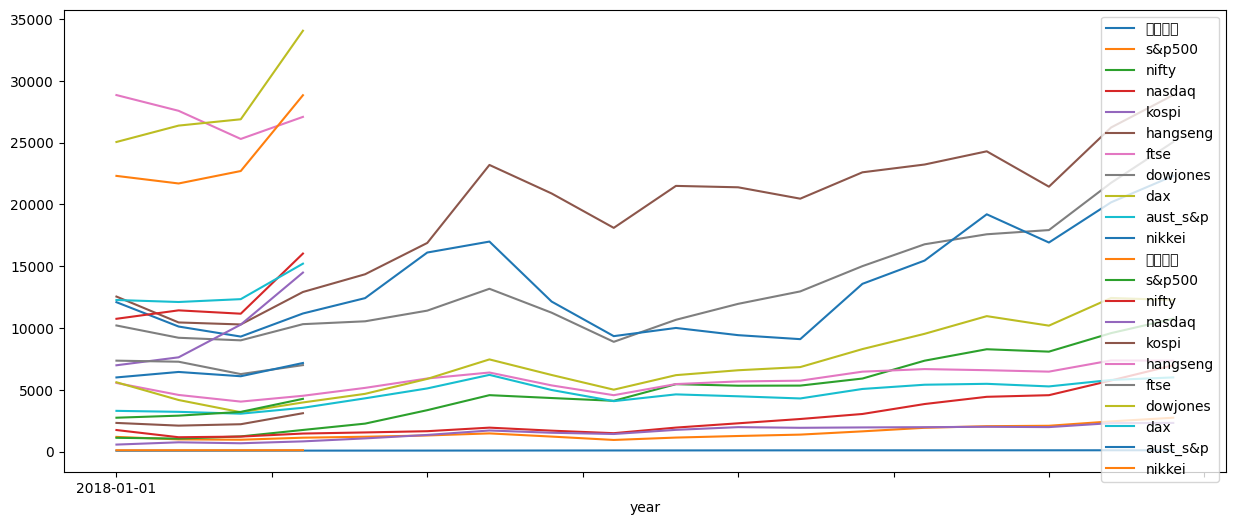

In [58]:
ax = train_data.plot()
test_data.plot(ax=ax)
plt.show()